In [1]:
from my_functions.assel_functions import analyse_simulation
from my_functions.run_simulation import run_simulation
import numpy as np
from timeit import default_timer as timer

In [2]:
def LPA_stage(varied_param):    
    start = timer()
    E_laser = varied_param
    bunch, bunch_list = run_simulation(varied_param)
    end = timer()
    print(f"Elapsed time in minutes =  {(end - start) / 60}")
    
    # without filter
    for i in range(1,4):
        objective_function = analyse_simulation(E_laser,bunch_list,filtered=False,obj_type=i)
        np.savetxt(f'NoFilter_obj_type_{i}.txt', np.array([objective_function]))
        
    #with filter
    for i in range(1,4):
        objective_function = analyse_simulation(E_laser,bunch_list,filtered=True,obj_type=i)
        np.savetxt(f'Filter_obj_type_{i}.txt', np.array([objective_function]))

In [3]:
# 14.4, 15.4, 15.8, 16.3

In [4]:
E_laser = 14.4

In [5]:
bunch, bunch_list = run_simulation(E_laser)

Generating particle distribution... Done.

Plasma stage
------------
Tracking in 10 step(s)... [--------------------] Done (843.477 seconds).
--------------------------------------------------------------------------------


ValueError: autodetected range of [nan, nan] is not finite

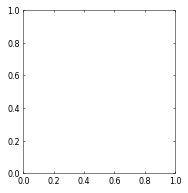

In [6]:
bunch.show()

In [ ]:
bunch_list

In [ ]:
import numpy as np
import scipy.constants as ct
from wake_t import GaussianPulse, PlasmaStage, ParticleBunch
import aptools.plasma_accel.general_equations as ge
from aptools.utilities.bunch_generation import generate_gaussian_bunch_from_twiss

#----------
from aptools.data_processing.beam_filtering import filter_beam
import visualpic as vp
import os

In [ ]:
def analyse_simulation(E_laser,bunch_list,filtered=True,obj_type=1):
    
    E_laser = E_laser * 6.242* 1e12 # MeV
    
    dc = vp.DataContainer('openpmd',
                                  os.path.join('./', 'diags/hdf5'))
    dc.load_data()

    bunch = dc.get_species('bunch')
    ts = bunch.timesteps
    bunch_data = bunch.get_data(ts[-1])
    x = bunch_data['x'][0]
    y = bunch_data['y'][0]
    px = bunch_data['px'][0]
    py = bunch_data['py'][0]
    pz = bunch_data['pz'][0]
    q = bunch_data['q'][0]
    
    
    print("Nans in px")
    print(np.isnan(px).sum())
    print("Nans in py")
    print(np.isnan(py).sum())
    print("Nans in pz")
    print(np.isnan(pz).sum())
    
    if filtered:
        x, y, px, py, pz, q = filter_beam(
            np.array([x, y, px, py, pz, q]),
            [None, None, None, None, 150. / 0.511, None],
            [None, None, None, None, None, None]
        )
    

    E_total = np.sqrt(1 + px**2 + py**2 + pz**2)* 0.511 # in MeV
    print("Nans in E_total")
    print(np.isnan(E_total).sum())
    
    # Задача 1: ускорить до 150 МэВ
    if obj_type == 1:    
        N_electrons = E_total.shape[0]
        obj_func = 1/N_electrons * np.sum(np.square(np.subtract(E_total,150)))
        print(f'MSE = {obj_func}')
    elif obj_type == 2:  
        E_average = np.average(E_total, weights=q)
        print(f'E_average = {E_average}')
        obj_func = np.abs(E_average-150)
        print(f'abs difference = {obj_func}')
    
    # Задача 2: конвертация энергии до 100%
    elif obj_type == 3:
        E_beam = np.sum(E_total)
        obj_func = E_beam / E_laser * 100
        print(f"Energy conversion = {obj_func}")
        
    return obj_func

In [ ]:
objective_function = analyse_simulation(E_laser,bunch_list,filtered=False,obj_type=1)

In [ ]:
a = np.array([1,2,3,4])
b = np.array([2,4,3,4])

In [ ]:
a**2

In [ ]:
a.sum()

In [ ]:
np.square(a)

In [ ]:
LPA_stage(E_laser)